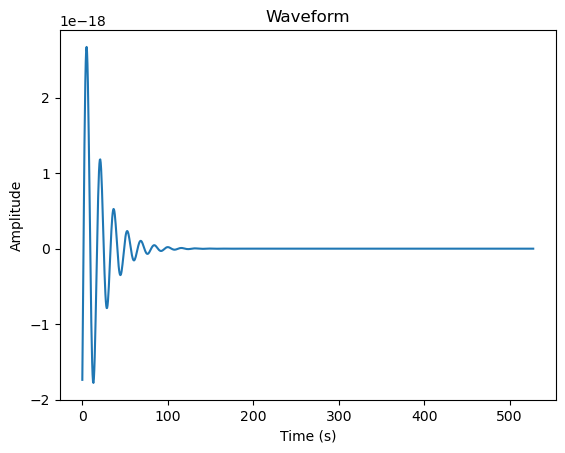

In [ ]:

import sys
import os
#import shutil
# 将 `code/Ringdown_gap_filling/Proj/` 添加到 sys.path
proj_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
if proj_dir not in sys.path:
    sys.path.append(proj_dir)
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#import bilby
#import corner
from config.config import Config
from data.waveform_GR.rd_wf_t import *


factor=10


class MyWaveform:
    def __init__(self, samp_freq,  f_in=Config.f_in, f_out=Config.f_out, f_step=Config.f_step):
        self.f_in = f_in
        self.f_out = f_out
        self.f_step = f_step

        self.samp_freq = samp_freq

    def __call__(self, **params):
        # 参数处理
        M = params['M']#无量纲的M_mass=(10**m)*Ms
        r= params['r']*factor#光度距离，单位Gpc
        a= params['a']#无量纲自旋
        v= params['v']#对称质量比
        # phi= params['phi']
        # x= params['x']
        # theta= params['theta']
        # psi= params['psi']
        # phi0= params['phi0']
        
        
        
        
        dt=1/self.samp_freq  # 采样间隔
        # 频率数组
        t=np.arange(0, Config.signal_length)*dt
        # 构建频域分量
        h=hst(t,M,r,a,v)

        return t,h
    
def model(**kwargs):
    waveform_generator = kwargs['waveform']  # 类实例
    waveform = waveform_generator(**kwargs)  # 传入其余参数
    return waveform

# 实例化模板生成器
waveform_class = MyWaveform( samp_freq=Config.samp_freq,
    
   
    f_in=Config.f_in,
    f_out=Config.f_out,
    f_step=Config.f_step,
    
)

# 生成波形
t,waveform = model(waveform=waveform_class,M=3e5,r=0.5 , a=0.8,v=2/9)
#绘制波形
plt.plot(t,waveform)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveform')
plt.show()


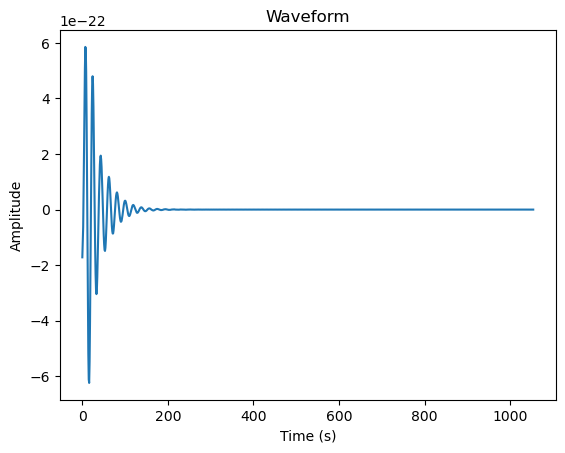

In [ ]:

# import sys
# import os
# #import shutil
# # 将 `code/Ringdown_gap_filling/Proj/` 添加到 sys.path
# proj_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
# if proj_dir not in sys.path:
#     sys.path.append(proj_dir)
# import numpy as np
# import matplotlib
# import matplotlib.pyplot as plt
# #import bilby
# #import corner
# from config.config import Config
# from data.waveform import *
# from data.ringdown_waveform import Gap_dir as Ga
# #检查是否有/home/ljq/code/Ringdown_gap_filling/Proj/utils目录下是否有test文件夹，如果没有就创建，有就清除里面的内容
# import shutil
# if not os.path.exists('/home/ljq/code/Ringdown_gap_filling/Proj/utils/test'):
#     os.makedirs('/home/ljq/code/Ringdown_gap_filling/Proj/utils/test')
# else:
#     shutil.rmtree('/home/ljq/code/Ringdown_gap_filling/Proj/utils/test')
#     os.makedirs('/home/ljq/code/Ringdown_gap_filling/Proj/utils/test')









# class MyWaveform:
#     def __init__(self, samp_freq,Para_dw=para_dw, Para_dtau=para_dtau,  f_in=Config.f_in, f_out=Config.f_out, f_step=Config.f_step):
#         self.f_in = f_in
#         self.f_out = f_out
#         self.f_step = f_step
#         self.Para_dw = Para_dw
#         self.Para_dtau = Para_dtau
#         self.samp_freq = samp_freq

#     def __call__(self, **params):
#         # 参数处理
#         Mtot = params['Mtot']
#         M_ratio = params['M_ratio']
#         R_shift = params['R_shift']
        
#         # 计算参数 
#         para1 = [Mtot, M_ratio, R_shift]

#         # 频率数组
#         freq_ifft = np.arange(self.f_in, self.f_out, self.f_step)

#         # 构建频域分量
#         f_sf22, f_sf21, f_sf33, f_sf44 = sf_decomposition(freq_ifft, para1, self.Para_dw, self.Para_dtau)
#         f_sf = f_sf22 + f_sf21 + f_sf33 + f_sf44

#         # 转为时域波形
#         st = np.real(Ga.Freq_ifft(f_sf))

#         return st
    
# def model(**kwargs):
#     waveform_generator = kwargs['waveform']  # 类实例
#     waveform = waveform_generator(**kwargs)  # 传入其余参数
#     return waveform

# # 实例化模板生成器
# waveform_class = MyWaveform( samp_freq=Config.samp_freq,
#     Para_dw=para_dw,
#     Para_dtau=para_dtau,
   
#     f_in=Config.f_in,
#     f_out=Config.f_out,
#     f_step=Config.f_step,
    
# )

# # 生成波形
# waveform = model(waveform=waveform_class, Mtot=1.15e5, M_ratio=0.95, R_shift=5)*1e-1
# #绘制波形
# plt.plot(waveform[1:Config.signal_length])
# plt.xlabel('Time (s)')
# plt.ylabel('Amplitude')
# plt.title('Waveform')
# plt.show()


[-2.24270011e-24+0.00000000e+00j -2.24460739e-24+1.40593013e-25j
 -2.25033394e-24+2.81883145e-25j ...  3.41787902e-28-5.54373733e-30j
  3.41778680e-28-2.77184355e-30j  3.41775606e-28+0.00000000e+00j]


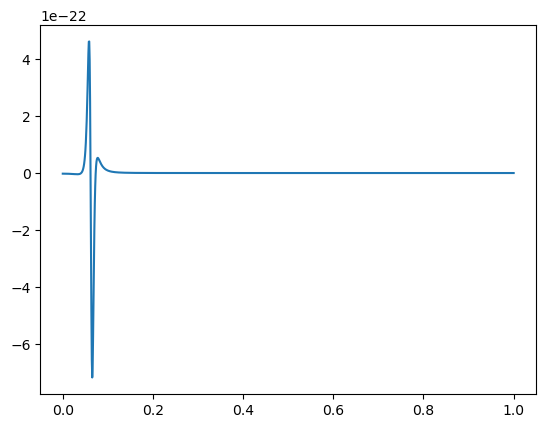

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def prepare_signal(signal, dt, window_function=np.hanning, pad_factor=1):
    """
    对时域信号进行预处理：加窗和零填充。
    
    参数:
      signal         -- 原始时域信号 (一维 numpy 数组)
      dt             -- 采样间隔 (秒)
      window_function-- 用于加窗的函数，例如 np.hanning, np.hamming 等
      pad_factor     -- 零填充因子 (整数, 1 表示不填充，2 表示填充到原始长度2倍)
    
    返回:
      padded_signal  -- 经过窗函数处理且零填充后的信号
      window         -- 实际应用的窗函数数组（可用于归一化能量）
    """
    N = len(signal)
    window = window_function(N)
    windowed_signal = signal * window

    # 如果pad_factor > 1，则在末尾追加零以增加FFT分辨率
    if pad_factor > 1:
        N_pad = pad_factor * N
        padded_signal = np.zeros(N_pad)
        padded_signal[:N] = windowed_signal
    else:
        padded_signal = windowed_signal
    return padded_signal, window

def compute_fft(signal, dt):
    """
    计算信号的快速傅里叶变换（FFT），返回频率轴和 FFT 的结果。
    
    参数:
      signal -- 经过预处理（窗函数/零填充）的时域信号（实数）
      dt     -- 采样间隔 (秒)
      
    返回:
      freq        -- 一侧频率轴（Hz），利用 np.fft.rfftfreq 构造
      fft_signal  -- 对应的 FFT 结果（归一化后）
    """
    N = len(signal)
    fft_signal = np.fft.rfft(signal)
    # 标准归一化：除以信号长度
    fft_signal = fft_signal / N
    freq = np.fft.rfftfreq(N, dt)
    return freq, fft_signal

def compute_snr(fft_signal, freq, noise_psd, fmin, fmax):
    """
    根据匹配滤波理论计算 SNR (信噪比)。
    
    SNR^2 = 4 ∫_fmin^fmax  |h(f)|^2 / S_n(f)  df
    
    参数:
      fft_signal -- 一侧 FFT 结果 (复数数组)
      freq       -- 频率轴 (Hz)
      noise_psd  -- 噪声功率谱密度，可以是一个函数 (f) 返回 S_n(f) 或一组数组
      fmin, fmax -- 积分下限和上限 (Hz)
      
    返回:
      snr  -- 计算得到的信噪比 (标量)
    """
    # 限制在指定频率范围内
    mask = (freq >= fmin) & (freq <= fmax)
    df = freq[1] - freq[0]  # 假设均匀采样
    
    # 如果 noise_psd 为函数，则计算对应 S_n
    if callable(noise_psd):
        S_n = noise_psd(freq[mask])
    else:
        S_n = noise_psd[mask]
    
    # 利用梯形积分计算 SNR^2
    snr_sq = 4 * np.sum((np.abs(fft_signal[mask])**2) / S_n) * df
    snr = np.sqrt(snr_sq)
    return snr
sig_win,_=prepare_signal(waveform,1/Config.samp_freq,window_function=np.hanning,pad_factor=2)
freq,sig_f=compute_fft(sig_win,1/Config.samp_freq)
print(sig_f)
plt.plot(freq,sig_f.real)
    



In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import h5py
import pymultinest
# Load LISA noise data

LISA_noise_data = h5py.File("/home/ljq/code/Ringdown_gap_filling/Proj/data/LISA_noise.mat", 'r')

# Extract noise data
nX = np.array(LISA_noise_data['nXVec'][:]).flatten()
nY = np.array(LISA_noise_data['nYVec'][:]).flatten()
nZ = np.array(LISA_noise_data['nZVec'][:]).flatten()

# Convert XYZ to A channel (simplified XYZ2AET function)
noise_A = (nZ - nX)/np.sqrt(2)

# Get sampling frequency
dt = 15  # assuming 15 seconds based on standard LISA data
fs = 1/dt

# Calculate PSD using Welch method
f_noise, psd_noise_A = signal.welch(noise_A, fs, nperseg=2**10)
#print(psd_noise_A)
# Plot the noise PSD
# plt.figure(figsize=(8, 5))
# plt.loglog(f_noise, np.sqrt(psd_noise_A), label='LISA Instrumental Noise (A channel)')
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('ASD (1/√Hz)')
# plt.title('LISA Instrumental Noise PSD')
# plt.grid(True, which='both', linestyle='--', alpha=0.5)
# plt.legend()
# plt.show()
from scipy.interpolate import interp1d

# 自定义频率数组
scale=Config.scale
samp_freq=Config.samp_freq
#freq=np.arange(Config.f_in, Config.f_out, Config.f_step)

# 构建 PSD 插值函数（外推时自动填充极小值）
psd_interp_func = interp1d(f_noise, psd_noise_A,
                           kind='linear',
                           bounds_error=False,
                           fill_value=1e-40)

# 得到目标频率数组上的 PSD
PSD = psd_interp_func(freq)

from utils.noise import generate_noise_from_psd
out_noise, _ = generate_noise_from_psd(len(waveform),freq,PSD, sample_rate=samp_freq)

data = waveform + out_noise[0]


paras=[2e5,2.5e5,0.5,0.7,0.7, 0.8,1/9,2/9]
M_min=paras[0]
M_bandwidth=paras[1]-paras[0]
r_min=paras[2]
r_bandwidth=paras[3]-paras[2]
a_min=paras[4]
a_bandwidth=paras[5]-Config.parameters[4]
v_min=paras[6]
v_bandwidth=paras[7]-paras[6]
def prior(cube, ndim, nparams):
    cube[0] = cube[0]*M_bandwidth+M_min
    cube[1] = cube[1]*r_bandwidth+r_min
    cube[2] = cube[2]*a_bandwidth+a_min
    cube[3] = cube[3]*v_bandwidth+v_min
   

def log_likelihood(cube, data,freq):
    """
    params : dict, e.g., {'M': ..., 'M_ratio': ..., 'R_shift': ...}
    waveform : waveform generator instance, e.g., MyWaveform
    data : time-domain data (signal + noise), 1D numpy array
    psd : PSD array corresponding to positive frequency bins
    samp_freq : sampling rate in Hz
    """
    # 1. 生成模板波形
    M,ratio,redshift= cube[0], cube[1], cube[2]
    h  = model(waveform=waveform_class, Mtot=M, M_ratio=ratio, R_shift=redshift)

    # 2. FFT 到频域
    d_f = np.fft.rfft(data)
    h_f = np.fft.rfft(h)

    # 3. 频率分辨率
    df = freq[1] - freq[0]
    
    

    # 4. PSD 截断 / 归一化处理（防止除以 0）
    #psd = np.clip(psd, 1e-30, None)

    # 5. 计算差值频谱
    res_f = d_f - h_f

    # 6. 计算内积
    inner_product = 4.0 * np.sum(np.abs(res_f)**2 /PSD) * df

    # 7. 返回对数似然值（忽略常数）
    return -0.5 * inner_product

parameters = ["$M/{M_ \odot}$", "$D_{L}$","$a$","sys ratio"]
n_params = len(parameters)


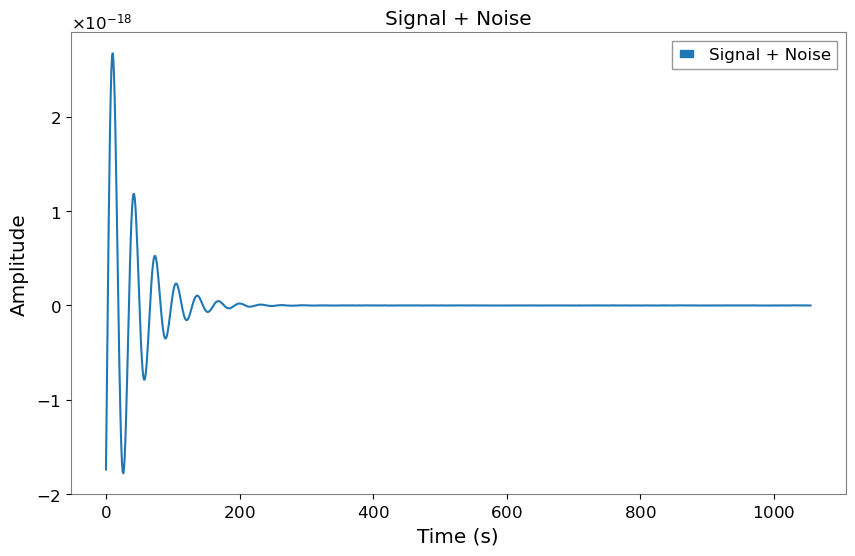

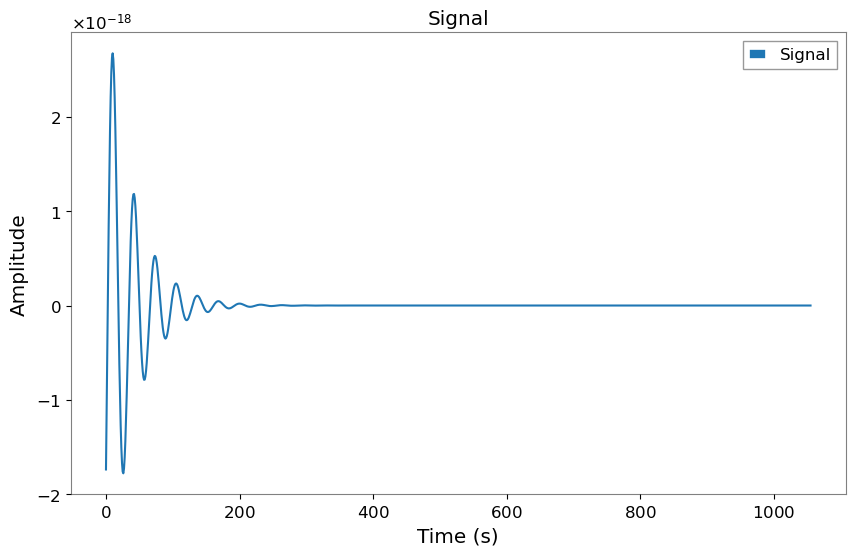

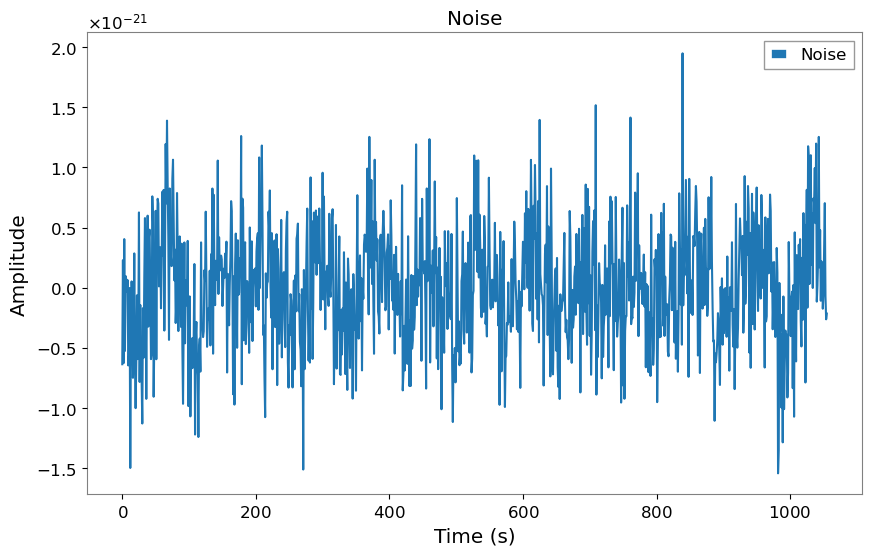

In [13]:
#绘制信号和噪声的时域图片
plt.figure(figsize=(10, 6))
plt.plot(data, label='Signal + Noise')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Signal + Noise')
plt.legend()
plt.grid()
#plt.savefig('Signal+Noise.png')
plt.show()
#绘制信号的时域图片
plt.figure(figsize=(10, 6))
plt.plot(waveform, label='Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Signal')
plt.legend()
plt.grid()
#plt.savefig('Signal.png')
plt.show()
#绘制噪声的时域图片
plt.figure(figsize=(10, 6))
plt.plot(out_noise[0], label='Noise')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Noise') 
plt.legend()
plt.grid()
#plt.savefig('Noise.png')
plt.show()

In [ ]:
pymultinest.run(log_likelihood, prior, n_params, outputfiles_basename='test/', resume = False, verbose = True)


Exception ignored on calling ctypes callback function: <function run.<locals>.loglike at 0x7f75238560d0>
Traceback (most recent call last):
  File "/home/ljq/miniconda3/envs/multinest_env/lib/python3.9/site-packages/pymultinest/run.py", line 228, in loglike
    return LogLikelihood(cube, ndim, nparams)
  File "/tmp/ipykernel_1328623/2500074606.py", line 75, in log_likelihood
  File "/tmp/ipykernel_1328623/3257713501.py", line 53, in model
  File "/tmp/ipykernel_1328623/3257713501.py", line 30, in __call__
KeyError: 'M'
Exception ignored on calling ctypes callback function: <function run.<locals>.loglike at 0x7f75238560d0>
Traceback (most recent call last):
  File "/home/ljq/miniconda3/envs/multinest_env/lib/python3.9/site-packages/pymultinest/run.py", line 228, in loglike
    return LogLikelihood(cube, ndim, nparams)
  File "/tmp/ipykernel_1328623/2500074606.py", line 75, in log_likelihood
  File "/tmp/ipykernel_1328623/3257713501.py", line 53, in model
  File "/tmp/ipykernel_1328623/3

 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  400
 dimensionality =    3
 *****************************************************
 Starting MultiNest
 generating live points


Exception ignored on calling ctypes callback function: <function run.<locals>.loglike at 0x7f75238560d0>
Traceback (most recent call last):
  File "/home/ljq/miniconda3/envs/multinest_env/lib/python3.9/site-packages/pymultinest/run.py", line 228, in loglike
    return LogLikelihood(cube, ndim, nparams)
  File "/tmp/ipykernel_1328623/2500074606.py", line 75, in log_likelihood
  File "/tmp/ipykernel_1328623/3257713501.py", line 53, in model
  File "/tmp/ipykernel_1328623/3257713501.py", line 30, in __call__
KeyError: 'M'
Exception ignored on calling ctypes callback function: <function run.<locals>.loglike at 0x7f75238560d0>
Traceback (most recent call last):
  File "/home/ljq/miniconda3/envs/multinest_env/lib/python3.9/site-packages/pymultinest/run.py", line 228, in loglike
    return LogLikelihood(cube, ndim, nparams)
  File "/tmp/ipykernel_1328623/2500074606.py", line 75, in log_likelihood
  File "/tmp/ipykernel_1328623/3257713501.py", line 53, in model
  File "/tmp/ipykernel_1328623/3

In [ ]:
import json
json.dump(parameters, open('test/params.json', 'w'))

'''pymultinest.run(loglike, prior, n_params, outputfiles_basename='out/',
	resume = False, verbose = True)
json.dump(parameters, open('out/params.json', 'w'))'''
plt.figure() 
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
# 读取上传的 post_equal_weights.dat 文件，尝试解析为浮点数据并寻找格式错误的位置
import numpy as np

file_path = "/home/ljq/code/Ringdown_gap_filling/Proj/utils/test/post_equal_weights.dat"

# 尝试逐行读取并记录无法解析的行
bad_lines = []
with open(file_path, 'r') as f:
    for i, line in enumerate(f):
        try:
            _ = [float(x) for x in line.strip().split()]
        except ValueError:
            bad_lines.append((i, line.strip()))

bad_lines[:5]  # 显示前几行错误内容作为样例

# 修复文件：为最后一列中缺失的指数符号（E）添加上，并保存为新文件
fixed_lines = []
with open(file_path, 'r') as f:
    for line in f:
        parts = line.strip().split()
        if len(parts) == 4:
            last = parts[-1]
            # 如果最后一列看起来像缺少 'E' 的科学计数法
            if '-' in last[1:] or '+' in last[1:]:
                for idx in range(1, len(last)):
                    if last[idx] in '-+' and last[idx-1].isdigit():
                        last_fixed = last[:idx] + 'E' + last[idx:]
                        parts[-1] = last_fixed
                        break
        fixed_lines.append("    ".join(parts))

# 保存修复后的文件
fixed_file_path = "/home/ljq/code/Ringdown_gap_filling/Proj/utils/test/post_equal_weights.dat"
with open(fixed_file_path, 'w') as f:
    for line in fixed_lines:
        f.write(line + '\n')

fixed_file_path


'/home/ljq/code/Ringdown_gap_filling/Proj/utils/test/post_equal_weights.dat'

  analysing data from test/.txt


/home/ljq/miniconda3/envs/multinest_env/lib/python3.9/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/ljq/miniconda3/envs/multinest_env/lib/python3.9/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


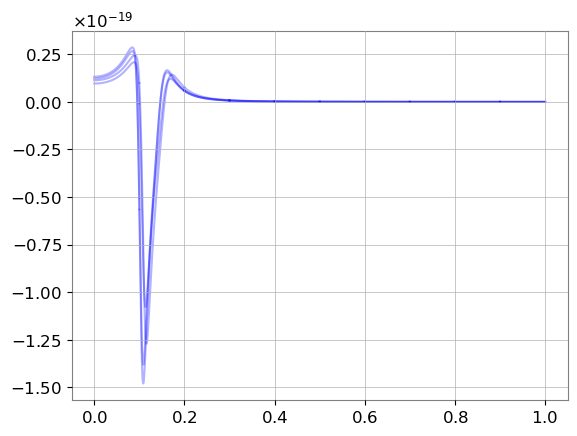

In [ ]:
A = pymultinest.Analyzer(outputfiles_basename='test/', n_params = n_params)
for (Mtot, M_ratio,R_shift) in A.get_equal_weighted_posterior()[::100,:-1]:
	plt.plot(freq, np.fft.rfft(model(waveform=waveform_class,Mtot=Mtot, M_ratio=M_ratio,R_shift=R_shift)), '-', color='blue', alpha=0.3, label='data')

In [ ]:
# 修复 .txt 文件中类似 '-0.139054859425643672-308' 的错误格式，插入缺失的 E
input_file_path = "/home/ljq/code/Ringdown_gap_filling/Proj/utils/test/.txt"
output_file_path = "/home/ljq/code/Ringdown_gap_filling/Proj/utils/test/.txt"

fixed_lines_data = []
with open(input_file_path, 'r') as infile:
    for line in infile:
        parts = line.strip().split()
        fixed_parts = []
        for part in parts:
            # 检查是否缺失 E 的科学计数法格式
            if '-' in part[1:] or '+' in part[1:]:
                inserted = False
                for i in range(1, len(part)):
                    if part[i] in '-+' and part[i-1].isdigit() and 'E' not in part:
                        part = part[:i] + 'E' + part[i:]
                        inserted = True
                        break
            fixed_parts.append(part)
        fixed_lines_data.append("    ".join(fixed_parts))

# 写入修复后的文件
with open(output_file_path, 'w') as outfile:
    for line in fixed_lines_data:
        outfile.write(line + '\n')

output_file_path


'/home/ljq/code/Ringdown_gap_filling/Proj/utils/test/.txt'

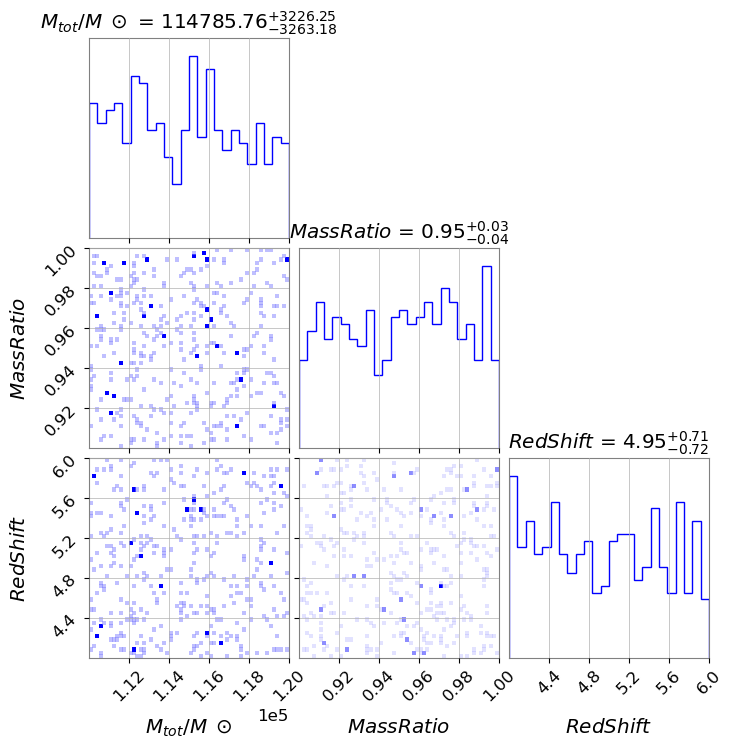

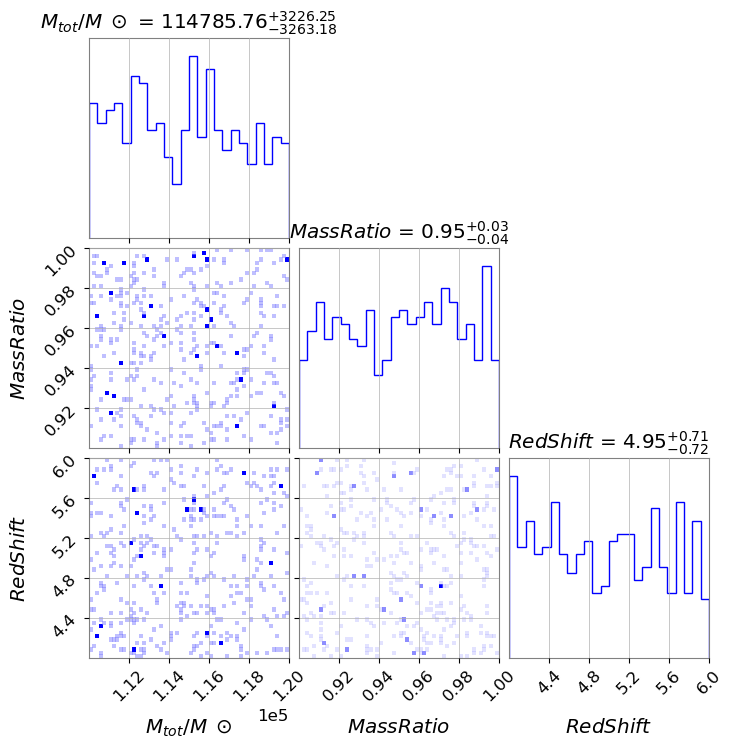

In [ ]:
data1 = A.get_data()[:,2:]
weights = A.get_data()[:,0]
import corner
#mask = weights.cumsum() > 1e-5
# mask = weights > 1e-4
mask = weights > 1e-40
#  -10.55 -10.54 -10.17 -10.47
#truths = [-11.07, None, -10.76, None, 0.667 , None, 0.667, None]
# truths = [-11.07, -11.12, None, None, 0.667, 0.667, None, None]
color = ['b', 'g', 'orange']
myrange = [(1.1e5, 1.2e5), (0.9, 1), (4, 6)]
corner.corner(
    data1[mask, :],
    weights=weights[mask],
    bins=60,
    hist_bin_factor=0.4,
    histtype='bar',
    labels=parameters,
    color='blue', 
    show_titles=True,
    range=myrange,
    plot_contours=False,
    truth_color='k',
    plot_datapoints=False
)


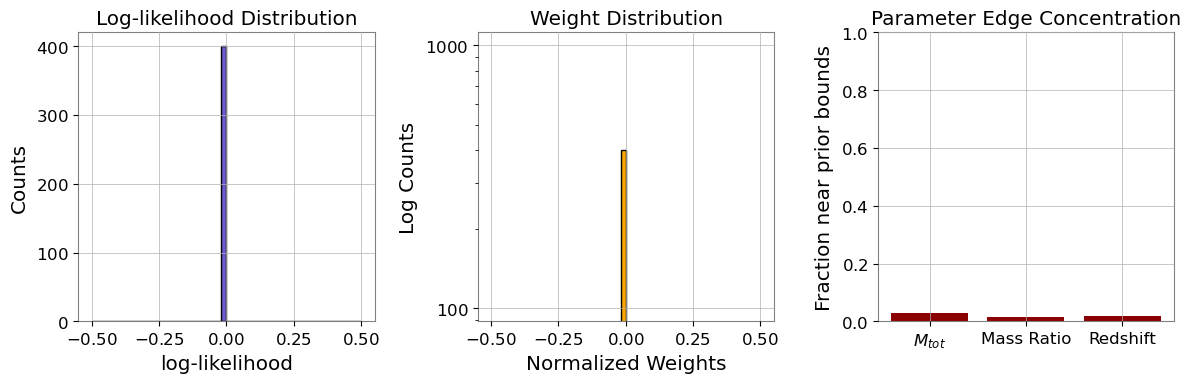

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 加载修复后的 posterior 数据文件
posterior_file_path = "/home/ljq/code/Ringdown_gap_filling/Proj/utils/test/.txt"
posterior_data = np.loadtxt(posterior_file_path)

# 提取 weights 和 logL
weights = posterior_data[:, 0]
logL = posterior_data[:, 1]
params = posterior_data[:, 2:]

# 权重归一化
weights /= np.sum(weights)

# 绘制 logL 分布
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(logL, bins=50, color='slateblue', edgecolor='black')
plt.xlabel('log-likelihood')
plt.ylabel('Counts')
plt.title('Log-likelihood Distribution')

# 绘制权重分布（对数坐标查看稀疏性）
plt.subplot(1, 3, 2)
plt.hist(weights, bins=50, color='orange', edgecolor='black', log=True)
plt.xlabel('Normalized Weights')
plt.ylabel('Log Counts')
plt.title('Weight Distribution')

# 绘制边界占比（即接近 prior 边界的样本数比例）
prior_bounds = np.array([
    [1.1e5, 1.2e5],  # Mtot
    [0.9, 1.0],      # Mass ratio
    [4, 6]           # Redshift
])
boundary_threshold = 0.01  # 边界附近的 ±1%

boundary_counts = []
for i in range(3):
    low, high = prior_bounds[i]
    near_lower = (params[:, i] - low) < (high - low) * boundary_threshold
    near_upper = (high - params[:, i]) < (high - low) * boundary_threshold
    boundary_counts.append(np.sum(near_lower | near_upper) / len(params))

plt.subplot(1, 3, 3)
plt.bar(["$M_{tot}$", "Mass Ratio", "Redshift"], boundary_counts, color='darkred')
plt.ylabel("Fraction near prior bounds")
plt.ylim(0, 1)
plt.title("Parameter Edge Concentration")

plt.tight_layout()
plt.show()


In [ ]:
for M in [1.12e5, 1.15e5, 1.18e5]:
    ll = log_likelihood([M, 0.95, 5.0], data, freq)
    print(f"Mtot = {M}, logL = {ll}")


Mtot = 112000.0, logL = -3934555.45929088
Mtot = 115000.0, logL = -4520584.174618991
Mtot = 118000.0, logL = -5176527.119133887


In [ ]:
print("Signal norm:", np.linalg.norm(waveform))
print("Noise norm:", np.linalg.norm(out_noise[0]))


Signal norm: 2.2548466063967195e-21
Noise norm: 7.952901966753993e-21
